In [5]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects

# read data
with open('data_clean.dat') as f:
    data = pickle.load(f)
f.close()

n_boot = 100

ind_set = range(len(data))

es_m2s_mean = np.zeros([n_boot,4])
es_s2m_mean = np.zeros([n_boot,4])

for k in range(n_boot):
    
    print k,
    
    inds = np.random.choice(ind_set, size=len(data), replace=True)

    es_s2m = np.zeros([len(data),4])
    es_m2s = np.zeros([len(data),4])
    
    for (c,i) in enumerate(inds):

        # mood on sleep - lag 0
        treatment = np.array(data[i]['mood_prev'])
        outcome = np.array(data[i]['quality'])
        confound = np.array(pd.concat([data[i]['act_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype']],axis=1))
        es_m2s[c,0] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')

        # mood on sleep - lag 1
        treatment = np.array(data[i]['mood_prev'])
        outcome = np.array(data[i]['quality'])
        confound = np.array(pd.concat([data[i]['act_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype'],\
                                      data[i]['mood_prev2'],data[i]['quality_prev']],axis=1))
        es_m2s[c,1] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')

        # mood on sleep - lag 2
        treatment = np.array(data[i]['mood_prev'])
        outcome = np.array(data[i]['quality'])
        confound = np.array(pd.concat([data[i]['act_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype'],\
                                      data[i]['mood_prev2'],data[i]['quality_prev'],data[i]['mood_prev3'],data[i]['quality_prev2']],axis=1))
        es_m2s[c,2] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')

        # mood on sleep - lag 3
        treatment = np.array(data[i]['mood_prev'])
        outcome = np.array(data[i]['quality'])
        confound = np.array(pd.concat([data[i]['act_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype'],\
                                      data[i]['mood_prev2'],data[i]['quality_prev'],data[i]['mood_prev3'],data[i]['quality_prev2'],data[i]['mood_prev4'],data[i]['quality_prev3']],axis=1))
        es_m2s[c,3] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')
        
        # sleep on mood - lag 0
        treatment = np.array(data[i]['quality'])
        outcome = np.array(data[i]['mood'])
        confound = np.array(pd.concat([data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype']],axis=1))
        es_s2m[c,0] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')

        # sleep on mood - lag 1
        treatment = np.array(data[i]['quality'])
        outcome = np.array(data[i]['mood'])
        confound = np.array(pd.concat([data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype'],\
                                      data[i]['mood_prev'],data[i]['quality_prev']],axis=1))
        es_s2m[c,1] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')
        
        # sleep on mood - lag 2
        treatment = np.array(data[i]['quality'])
        outcome = np.array(data[i]['mood'])
        confound = np.array(pd.concat([data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype'],\
                                      data[i]['mood_prev'],data[i]['quality_prev'],data[i]['mood_prev2'],data[i]['quality_prev2']],axis=1))
        es_s2m[c,2] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')
        
        # sleep on mood - lag 3
        treatment = np.array(data[i]['quality'])
        outcome = np.array(data[i]['mood'])
        confound = np.array(pd.concat([data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype'],\
                                      data[i]['mood_prev'],data[i]['quality_prev'],data[i]['mood_prev2'],data[i]['quality_prev2'],data[i]['mood_prev3'],data[i]['quality_prev3']],axis=1))
        es_s2m[c,3] = psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement')
        
    es_m2s_mean[k,:] = np.nanmean(es_m2s, axis=0)
    es_s2m_mean[k,:] = np.nanmean(es_s2m, axis=0)
    


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


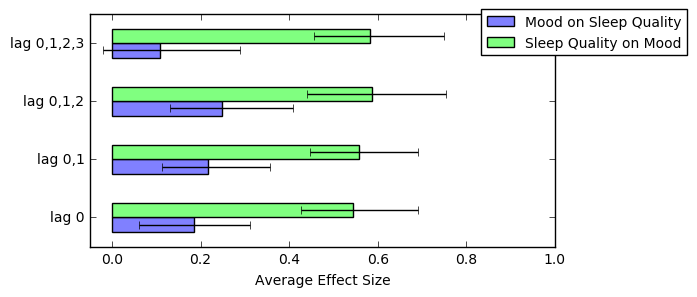

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,3))
plt.barh([0.75,1.75,2.75,3.75],np.mean(es_m2s_mean,axis=0),xerr=np.array([\
    [np.mean(es_m2s_mean[:,0])-np.percentile(es_m2s_mean[:,0],2.5),np.percentile(es_m2s_mean[:,0],97.5)-np.mean(es_m2s_mean[:,0])],\
    [np.mean(es_m2s_mean[:,1])-np.percentile(es_m2s_mean[:,1],2.5),np.percentile(es_m2s_mean[:,1],97.5)-np.mean(es_m2s_mean[:,1])],\
    [np.mean(es_m2s_mean[:,2])-np.percentile(es_m2s_mean[:,2],2.5),np.percentile(es_m2s_mean[:,2],97.5)-np.mean(es_m2s_mean[:,2])],\
    [np.mean(es_m2s_mean[:,3])-np.percentile(es_m2s_mean[:,3],2.5),np.percentile(es_m2s_mean[:,3],97.5)-np.mean(es_m2s_mean[:,3])]]).reshape(2,4),\
    ecolor=(0,0,0),height=.25,color=(.5,.5,1))
plt.barh([1,2,3,4],np.mean(es_s2m_mean,axis=0),xerr=np.array([\
    [np.mean(es_s2m_mean[:,0])-np.percentile(es_s2m_mean[:,0],2.5),np.percentile(es_s2m_mean[:,0],97.5)-np.mean(es_s2m_mean[:,0])],\
    [np.mean(es_s2m_mean[:,1])-np.percentile(es_s2m_mean[:,1],2.5),np.percentile(es_s2m_mean[:,1],97.5)-np.mean(es_s2m_mean[:,1])],\
    [np.mean(es_s2m_mean[:,2])-np.percentile(es_s2m_mean[:,2],2.5),np.percentile(es_s2m_mean[:,2],97.5)-np.mean(es_s2m_mean[:,2])],\
    [np.mean(es_s2m_mean[:,3])-np.percentile(es_s2m_mean[:,3],2.5),np.percentile(es_s2m_mean[:,3],97.5)-np.mean(es_s2m_mean[:,3])]]).reshape(2,4),\
    ecolor=(0,0,0),height=.25,color=(.5,1,.5))
plt.xlim([-.05,1])
plt.yticks([1,2,3,4],['lag 0','lag 0,1','lag 0,1,2','lag 0,1,2,3'],rotation=0);
plt.xlabel('Average Effect Size')
plt.legend(['Mood on Sleep Quality','Sleep Quality on Mood'],loc='upper right',bbox_to_anchor=(1.3, 1.05), fontsize=10);